In [22]:
import pandas as pd
%matplotlib inline
turn_stile_df = pd.read_csv("Turnstile_Usage_Data__2016.csv")

# Size of dataset:
print(turn_stile_df.shape)

(9492670, 11)


In [2]:
turn_stile_df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736


The different stations

In [3]:
turn_stile_df.Station.unique()

array(['59 ST', '5 AV/59 ST', '49 ST', '57 ST-7 AV', '23 ST',
       'TIMES SQ-42 ST', '34 ST-HERALD SQ', '28 ST', '14 ST-UNION SQ',
       '8 ST-NYU', 'BROAD ST', 'PRINCE ST', 'CANAL ST', 'CITY HALL',
       'CORTLANDT ST', 'RECTOR ST', 'WHITEHALL S-FRY', 'DELANCEY/ESSEX',
       'BOWERY', 'CHAMBERS ST', 'FULTON ST', '7 AV', 'PARK PLACE',
       'BOTANIC GARDEN', 'PROSPECT PARK', 'PARKSIDE AV', 'AVENUE H',
       'CHURCH AV', 'BEVERLEY ROAD', 'CORTELYOU RD', 'NEWKIRK PLAZA',
       'AVENUE J', 'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD',
       'SHEEPSHEAD BAY', 'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL',
       'JAY ST-METROTEC', 'DEKALB AV', 'ATL AV-BARCLAY', '86 ST',
       'UNION ST', '4AV-9 ST', 'PROSPECT AV', '25 ST', '36 ST', '45 ST',
       '53 ST', 'BAY RIDGE AV', '77 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
       'W 8 ST-AQUARIUM',

Time Frame

In [4]:
turn_stile_df.Date.min(),turn_stile_df.Date.max()

('01/02/2016', '12/30/2016')

In [5]:
turn_stile_df.Date.nunique()

336

59 Street station only

In [6]:
turn_59_df = turn_stile_df[turn_stile_df.Station == '59 ST']

In [8]:
turn_59_df.shape

(108842, 11)

Usage by date, 59 st

In [18]:
turn_59_group = turn_59_df.groupby("Date")
turn_59_group = turn_59_group.count()
turn_59_group

,C/A,Unit,SCP,Station,Line Name,Division,Time,Description,Entries,Exits
Date,,,,,,,,,,
01/02/2016,306,306,306,306,306,306,306,306,306,306
01/03/2016,305,305,305,305,305,305,305,305,305,305
01/04/2016,314,314,314,314,314,314,314,314,314,314
01/05/2016,354,354,354,354,354,354,354,354,354,354
01/06/2016,312,312,312,312,312,312,312,312,312,312
01/07/2016,385,385,385,385,385,385,385,385,385,385
01/08/2016,319,319,319,319,319,319,319,319,319,319
01/09/2016,330,330,330,330,330,330,330,330,330,330
01/10/2016,301,301,301,301,301,301,301,301,301,301


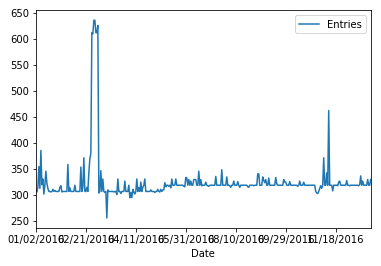

In [23]:
turn_59_group.plot(y='Entries', use_index=True)